In [19]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_selection import RFE

In [20]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [21]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [22]:
#cross validation

from sklearn.model_selection import train_test_split # replaces deprecated code

#from sklearn.cross_validation import train_test_split
## This is deprecated. Why is it in the course material?

In [23]:
#data
rawData = pd.read_csv('creditFiltered.csv', header=0)
rawData.head()

,Unnamed: 0,id,limit,sex,edu,marriage,age,pay1,pay2,pay3,...,bill4,bill5,bill6,paid1,paid2,paid3,paid4,paid5,paid6,default
0,0,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Cleaning and Preprocessing

In [24]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
Unnamed: 0    30000 non-null int64
id            30000 non-null int64
limit         30000 non-null int64
sex           30000 non-null int64
edu           30000 non-null int64
marriage      30000 non-null int64
age           30000 non-null int64
pay1          30000 non-null int64
pay2          30000 non-null int64
pay3          30000 non-null int64
pay4          30000 non-null int64
pay5          30000 non-null int64
pay6          30000 non-null int64
bill1         30000 non-null int64
bill2         30000 non-null int64
bill3         30000 non-null int64
bill4         30000 non-null int64
bill5         30000 non-null int64
bill6         30000 non-null int64
paid1         30000 non-null int64
paid2         30000 non-null int64
paid3         30000 non-null int64
paid4         30000 non-null int64
paid5         30000 non-null int64
paid6         30000 non-null int64
default       30

## Convert Categorical Variables that are Numeric Types into Category Types

In [25]:
# Convert categorical variables that are inputted as numeric into categorical types
rawData['sex'] = rawData.sex.astype('category')
rawData['edu'] = rawData.edu.astype('category')
rawData['marriage'] = rawData.marriage.astype('category')
rawData['pay1'] = rawData.pay1.astype('category')
rawData['pay2'] = rawData.pay2.astype('category')
rawData['pay3'] = rawData.pay3.astype('category')
rawData['pay4'] = rawData.pay4.astype('category')
rawData['pay5'] = rawData.pay5.astype('category')
rawData['pay6'] = rawData.pay6.astype('category')
rawData['default'] = rawData.default.astype('category')

## Create Train and Test set

70% and 30% split
Train Set: X_train, y_train: 
 Test Set: X_test, y_test (also referred to as ground truth, used to test predictions on for performance)

In [26]:
X = rawData.iloc[:,2:24]
y = rawData['default']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [28]:
print('The number of observations in the Y training set are:',str(len(y_train.index)))


The number of observations in the Y training set are: 21000


In [29]:
print('The number of observations in the X training set are:',str(len(X_train.index)))


The number of observations in the X training set are: 21000


In [30]:
print('The number of observations in the X testing set are:',str(len(X_test.index)))


The number of observations in the X testing set are: 9000


In [31]:
print('The number of observations in the y testing set are:',str(len(y_test.index)))


The number of observations in the y testing set are: 9000


In [32]:
# verify split
len(X_test)/(len(X_test)+len(X_train))

0.3

In [33]:
# verify split
len(y_test)/(len(y_test)+len(y_train))

0.3

# Classification (4 Models) - First Attempt

Which algorithms should we try?

- Linear Classifiers: Logistic regression, Naive Bayes classifier, Fisher’s linear discriminant
- Support vector machines: Least squares support vector machines
- Quadratic classifiers
- Kernel estimation: k-nearest neighbor 
- Decision trees: Random forests
- Neural networks
- Learning vector quantization

## Random Forest

In [34]:
# Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)
predictions_rf= rf_model.predict(X_test)

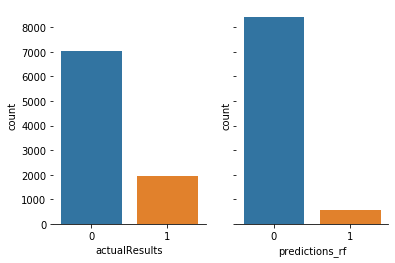

In [35]:
# Create pandas data frame of prediction and y_test results and plot it

predictions_df = pd.DataFrame(predictions_rf)
predictions_df.columns = ['predictions_rf']
predictions_df.reset_index(drop=True, inplace=True)
ytest_df = pd.DataFrame(y_test)
ytest_df.columns = ['actualResults']
ytest_df.reset_index(drop=True, inplace=True)
res = [ytest_df,predictions_df]
results_rf = pd.concat(res,sort=False, axis = 1)

fig, axes = plt.subplots(1,2, sharex=True, sharey= True)
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_rf, ax=axes[0] )
sns.countplot(x='predictions_rf', data = results_rf, ax=axes[1] )

## Least Squares Support Vector Machine

In [36]:
# Least Squares Support Vector Machine
from sklearn.svm import LinearSVC
lssVM_model = LinearSVC(random_state=0, tol=1000)
lssVM_model.fit(X_train, y_train)
predictions_lssVM= lssVM_model.predict(X_test)

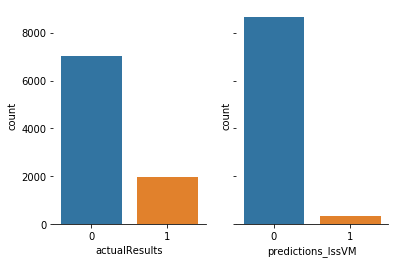

In [37]:
# Create pandas data frame of prediction and y_test results and plot it
predictions_df = pd.DataFrame(predictions_lssVM)
predictions_df.columns = ['predictions_lssVM']
predictions_df.reset_index(drop=True, inplace=True)
ytest_df = pd.DataFrame(y_test)
ytest_df.columns = ['actualResults']
ytest_df.reset_index(drop=True, inplace=True)
res = [ytest_df,predictions_df]
results_lssVM = pd.concat(res,sort=False, axis = 1)

fig, axes = plt.subplots(1,2, sharex=True, sharey= True)
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_lssVM, ax=axes[0] )
sns.countplot(x='predictions_lssVM', data = results_lssVM, ax=axes[1] )

## K- Nearest Neighbor

In [38]:
# K- Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
predictions_knn = knn_model.predict(X_test)

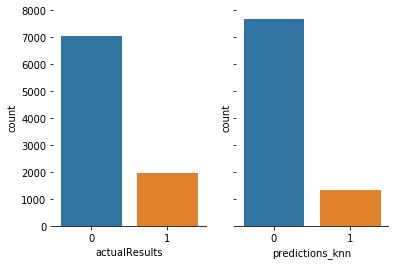

In [39]:
# Create pandas data frame of prediction and y_test results and plot it

predictions_df = pd.DataFrame(predictions_knn)
predictions_df.columns = ['predictions_knn']
predictions_df.reset_index(drop=True, inplace=True)
ytest_df = pd.DataFrame(y_test)
ytest_df.columns = ['actualResults']
ytest_df.reset_index(drop=True, inplace=True)
res = [ytest_df,predictions_df]
results_knn = pd.concat(res,sort=False, axis = 1)

fig, axes = plt.subplots(1,2, sharex=True, sharey= True)
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_knn, ax=axes[0] )
sns.countplot(x='predictions_knn', data = results_knn, ax=axes[1] )

## Gaussian Naive Bayes

In [40]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
predictions_gnb=gnb_model.predict(X_test)

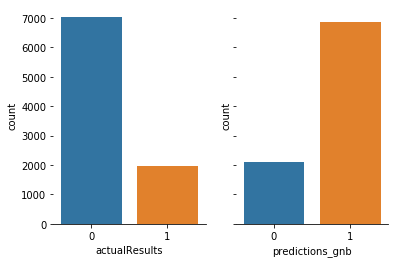

In [41]:
# Create pandas data frame of prediction and y_test results and plot it

predictions_df = pd.DataFrame(predictions_gnb)
predictions_df.columns = ['predictions_gnb']
predictions_df.reset_index(drop=True, inplace=True)
ytest_df = pd.DataFrame(y_test)
ytest_df.columns = ['actualResults']
ytest_df.reset_index(drop=True, inplace=True)
res = [ytest_df,predictions_df]
results_gnb = pd.concat(res,sort=False, axis = 1)

fig, axes = plt.subplots(1,2, sharex=True, sharey= True)
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_gnb, ax=axes[0] )
sns.countplot(x='predictions_gnb', data = results_gnb, ax=axes[1] )

## Performace Metrics for Models

### Model Accuracy

We have a class imbalance. Most of our customers did not default (which is great) but that means that accuracy is not the best metric due to the accuracy paradox. 

In [42]:
# Accuracy
from sklearn.metrics import accuracy_score
print('The RandomForest model Accuracy score is:',str(accuracy_score(y_test, predictions_rf)))
print('The Least Squares Support Vector Machine model Accuracy score is:',str(accuracy_score(y_test, predictions_lssVM)))
print('The  K-Nearest Neighbor model Accuracy score is:',str(accuracy_score(y_test, predictions_knn)))
print('The Gaussian Naive Bayes model Accuracy score is:',str(accuracy_score(y_test, predictions_gnb)))

The RandomForest model Accuracy score is: 0.8067777777777778
The Least Squares Support Vector Machine model Accuracy score is: 0.7668888888888888
The  K-Nearest Neighbor model Accuracy score is: 0.735
The Gaussian Naive Bayes model Accuracy score is: 0.3942222222222222


#### cross_val_score

In [43]:
print('The RandomForest model cross_val_score is:',str(cross_val_score(rf_model, X_train, y_train)))
print('The Least Squares Support Vector Machine model cross_val_score is:',str(cross_val_score(lssVM_model, X_train, y_train)))
print('The K-Nearest Neighbor model cross_val_score is:',str(cross_val_score(knn_model, X_train, y_train)))
print('The Gaussian Naive Bayes model cross_val_score is:',str(cross_val_score(gnb_model, X_train, y_train)))


The RandomForest model cross_val_score is: [0.81047619 0.80690476 0.80833333 0.80761905 0.80333333]
The Least Squares Support Vector Machine model cross_val_score is: [0.77714286 0.77333333 0.77738095 0.77714286 0.77738095]
The K-Nearest Neighbor model cross_val_score is: [0.7347619  0.74166667 0.74142857 0.72785714 0.73      ]
The Gaussian Naive Bayes model cross_val_score is: [0.37404762 0.39190476 0.3997619  0.39761905 0.39785714]


### Precision
What proportion of positive identifications (defaults) was actually correct?
When the model predicts a customer will default, how many times is it correct?
Ideally, we want a high precision. The higher the better. 

In [44]:
# Precision Score (Add percentage instead of decimal later)
from sklearn.metrics import precision_score
model="Random Forest"
score= precision_score(y_test, predictions_rf, average="binary")
print(f"When the {model} model predicts a customer will default, it is correct {score:.5f} of the time.")
model="Least Squares Support Vector Machine"
score= precision_score(y_test, predictions_lssVM, average="binary")
print(f"When the {model} model predicts a customer will default, it is correct {score:.5f} of the time.")
model="K-Nearest Neighbor"
score= precision_score(y_test, predictions_knn, average="binary")
print(f"When the {model} model predicts a customer will default, it is correct {score:.5f} of the time.")
model="Gaussian Naive Bayes"
score= precision_score(y_test, predictions_gnb, average="binary")
print(f"When the {model} model predicts a customer will default, it is correct {score:.5f} of the time.")

When the Random Forest model predicts a customer will default, it is correct 0.69352 of the time.
When the Least Squares Support Vector Machine model predicts a customer will default, it is correct 0.29341 of the time.
When the K-Nearest Neighbor model predicts a customer will default, it is correct 0.33840 of the time.
When the Gaussian Naive Bayes model predicts a customer will default, it is correct 0.24622 of the time.


### Recall
What proportion of actual positives was identified correctly?
How many times did the model correctly identify all customers who defaulted?
If we have false negatives, it means a customer defaulted but we did not detect it. Recall measures how many times our model predicts that a customer defaulted versus how many times customers actually defaulted. A higher score means we have little false negatives. A lower score means that the model is not correctly identifying these false negatives which is very important because this is our underlying problem. We have had customers who defaulted but we haven't successfully predicted who these customers are.

In [45]:
#Recall Score (Add percentage instead of decimal later)
from sklearn.metrics import recall_score
model="Random Forest"
score= recall_score(y_test, predictions_rf, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")
model="Least Squares Support Vector Machine"
score= recall_score(y_test, predictions_lssVM, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")
model="K-Nearest Neighbor"
score= recall_score(y_test, predictions_knn, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")
model="Gaussian Naive Bayes"
score= recall_score(y_test, predictions_gnb, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")

The Random Forest model correctly identifed all customer who defaulted 0.20204 of the time.
The Least Squares Support Vector Machine model correctly identifed all customer who defaulted 0.05000 of the time.
The K-Nearest Neighbor model correctly identifed all customer who defaulted 0.22704 of the time.
The Gaussian Naive Bayes model correctly identifed all customer who defaulted 0.86429 of the time.


### F1 Score
F1 = 2 * (precision * recall) / (precision + recall)
Combines precision and recall. We want a model with the highest F1 score. 

In [46]:
from sklearn.metrics import f1_score
model="Random Forest"
score= f1_score(y_test, predictions_rf, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")
model="Least Squares Support Vector Machine"
score= f1_score(y_test, predictions_lssVM, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")
model="K-Nearest Neighbor"
score= f1_score(y_test, predictions_knn, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")
model="Gaussian Naive Bayes"
score= f1_score(y_test, predictions_gnb, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")


The Random Forest model has an f1 score of 0.31292 .
The Least Squares Support Vector Machine model has an f1 score of 0.08544 .
The K-Nearest Neighbor model has an f1 score of 0.27176 .
The Gaussian Naive Bayes model has an f1 score of 0.38326 .


### Combined Bar Chart of Models: Actual vs Predictions

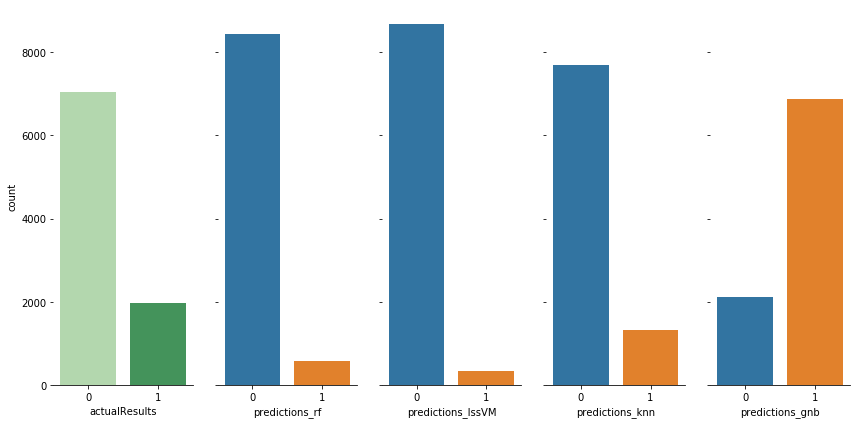

In [98]:
fig, axes = plt.subplots(1,5, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_rf, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_rf', data = results_rf, ax=axes[1] )
sns.countplot(x='predictions_lssVM', data =results_lssVM, ax=axes[2] )
sns.countplot(x='predictions_knn', data = results_knn, ax=axes[3] )
sns.countplot(x='predictions_gnb', data = results_gnb, ax=axes[4] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

# Classification (3 Models) - Second Attempt (Dimension Reduction 2 Methods, Outliers)

Which algorithms should we try?

- Linear Classifiers: Naive Bayes classifier
- Kernel estimation: k-nearest neighbor 
- Decision trees: Random forests

While doing the EDA, I have come up with several ways to improve the models:

- Outliers
- Dimension Reduction
 - Multicollinearity : Monthly Bills
- Class Imbalance Techniques

The first technique I will try in improving this model is by reducing the dimensions. Are there any improvements when removing highly correlated variables like monthly bill amounts?

## Dimension Reduction - Multicollinearity

In [ ]:
# Start Fresh

## load data
rawData = pd.read_csv('creditFiltered.csv', header=0)

## change categorical variables to category type
rawData['sex'] = rawData.sex.astype('category')
rawData['edu'] = rawData.edu.astype('category')
rawData['marriage'] = rawData.marriage.astype('category')
rawData['pay1'] = rawData.pay1.astype('category')
rawData['pay2'] = rawData.pay2.astype('category')
rawData['pay3'] = rawData.pay3.astype('category')
rawData['pay4'] = rawData.pay4.astype('category')
rawData['pay5'] = rawData.pay5.astype('category')
rawData['pay6'] = rawData.pay6.astype('category')
rawData['default'] = rawData.default.astype('category')

In [ ]:
# remove Bill Amounts from features
cols = ['limit', 'sex', 'edu', 'marriage', 'age', 'pay1',
       'pay2', 'pay3', 'pay4', 'pay5', 'pay6', 'paid1', 'paid2', 'paid3', 'paid4', 'paid5',
       'paid6', 'default']
X = rawData[cols]
y = rawData['default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

### Random Forest

In [ ]:
# Random Forest Model 
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)
predictions_rf= rf_model.predict(X_test)

In [ ]:
# Create pandas data frame of prediction and y_test results and plot it

predictions_df = pd.DataFrame(predictions_rf)
predictions_df.columns = ['predictions_rf']
predictions_df.reset_index(drop=True, inplace=True)
ytest_df = pd.DataFrame(y_test)
ytest_df.columns = ['actualResults']
ytest_df.reset_index(drop=True, inplace=True)
res = [ytest_df,predictions_df]
results_rf = pd.concat(res,sort=False, axis = 1)

fig, axes = plt.subplots(1,2, sharex=True, sharey= True)
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_rf, ax=axes[0] )
sns.countplot(x='predictions_rf', data = results_rf, ax=axes[1] )

### K- Nearest Neighbor

In [ ]:
# K- Nearest Neighbor
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
predictions_knn = knn_model.predict(X_test)

In [ ]:
# Create pandas data frame of prediction and y_test results and plot it

predictions_df = pd.DataFrame(predictions_knn)
predictions_df.columns = ['predictions_knn']
predictions_df.reset_index(drop=True, inplace=True)
ytest_df = pd.DataFrame(y_test)
ytest_df.columns = ['actualResults']
ytest_df.reset_index(drop=True, inplace=True)
res = [ytest_df,predictions_df]
results_knn = pd.concat(res,sort=False, axis = 1)

fig, axes = plt.subplots(1,2, sharex=True, sharey= True)
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_knn, ax=axes[0] )
sns.countplot(x='predictions_knn', data = results_knn, ax=axes[1] )

### Gaussian Naive Bayes

In [ ]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
predictions_gnb=gnb_model.predict(X_test)

In [ ]:
# Create pandas data frame of prediction and y_test results and plot it

predictions_df = pd.DataFrame(predictions_gnb)
predictions_df.columns = ['predictions_gnb']
predictions_df.reset_index(drop=True, inplace=True)
ytest_df = pd.DataFrame(y_test)
ytest_df.columns = ['actualResults']
ytest_df.reset_index(drop=True, inplace=True)
res = [ytest_df,predictions_df]
results_gnb = pd.concat(res,sort=False, axis = 1)

fig, axes = plt.subplots(1,2, sharex=True, sharey= True)
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_gnb, ax=axes[0] )
sns.countplot(x='predictions_gnb', data = results_gnb, ax=axes[1] )

### Performance Metrics for Models (Second Attempt - Multicollinearity)

####  Recall


In [ ]:
#Recall Score (Add percentage instead of decimal later)
model="Random Forest"
score= recall_score(y_test, predictions_rf, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")
model="K-Nearest Neighbor"
score= recall_score(y_test, predictions_knn, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")
model="Gaussian Naive Bayes"
score= recall_score(y_test, predictions_gnb, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")

#### F1 Score
F1 = 2 * (precision * recall) / (precision + recall)
Combines precision and recall. We want a model with the highest F1 score. 

In [ ]:
model="Random Forest"
score= f1_score(y_test, predictions_rf, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")
model="K-Nearest Neighbor"
score= f1_score(y_test, predictions_knn, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")
model="Gaussian Naive Bayes"
score= f1_score(y_test, predictions_gnb, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")


#### Combined Bar Chart of Models: Actual vs Predictions

In [ ]:
fig, axes = plt.subplots(1,4, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_lr, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_rf', data = results_rf, ax=axes[1] )
sns.countplot(x='predictions_knn', data = results_knn, ax=axes[2] )
sns.countplot(x='predictions_gnb', data = results_gnb, ax=axes[3] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

Notes:

Recall Score before:

- The Random Forest model correctly identifed all customer who defaulted 0.20453 of the time.
- The Least Squares Support Vector Machine model correctly identifed all customer who defaulted 0.00258 of the time.
- The K-Nearest Neighbor model correctly identifed all customer who defaulted 0.23802 of the time.
- The Gaussian Naive Bayest model correctly identifed all customer who defaulted 0.79650 of the time.

Recall Score After:

 - The Random Forest model correctly identifed all customer who defaulted 0.70222 of the time.
 - The K-Nearest Neighbor model correctly identifed all customer who defaulted 0.22308 of the time.
 - The Gaussian Naive Bayes model correctly identifed all customer who defaulted 0.81659 of the time.



F1 Score before:


 - <span style="color:red"> The Random Forest model has an f1 score of 0.31913 . </span>
 - The Least Squares Support Vector Machine model has an f1 score of 0.00512 .
 - The K-Nearest Neighbor model has an f1 score of 0.28812 .
 - The Gaussian Naive Bayes model has an f1 score of 0.40679 .

F1 Score after:

 - <span style="color:red"> The Random Forest model has an f1 score of 0.82506 . </span>
 - The K-Nearest Neighbor model has an f1 score of 0.27545.
 - The Gaussian Naive Bayes model has an f1 score of 0.40787.
 
Knn did not benefit from removing multocollinearity. It's F1 and Recall score decreased slighly. Gaussian Naive Bayes benefited only slighly Random Forest improved tremendously. 

## Recursive Feature Elimination

* I chose RFE over PCA because when looking at variance in EDA, there weren't features with low variance. 

* Let's find top 20 features (then 15)

### Recursive Feature Elimination for Random Forest


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_selection import RFE


#rf_model = RandomForestClassifier(max_depth=2, random_state=0)
#rf_model.fit(X_train, y_train)
#predictions_rf= rf_model.predict(X_test)



# Feature extraction
model = RandomForestClassifier()
rfe = RFE(model, 20)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


#X = rawData.iloc[:,2:24]
#y = rawData['default']

In [ ]:
print("All Features: %s" % (X_train.columns) )


This is really surprising. I would have expected bills to have the least rating. Instead, they're all important except for sex and lastly, marriage. How surprising. 

### Run Random Forest with RFE Features Only

In [ ]:
# Remove Sex and Marriage as Features
cols = ['limit', 'edu', 'age', 'pay1', 'pay2', 'pay3',
       'pay4', 'pay5', 'pay6', 'bill1', 'bill2', 'bill3', 'bill4', 'bill5',
       'bill6', 'paid1', 'paid2', 'paid3', 'paid4', 'paid5']


X = rawData[cols]
y = rawData['default']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [ ]:
# Random Forest Model 
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)
predictions_rf_rfe= rf_model.predict(X_test)

In [ ]:
model="Random Forest"
score= recall_score(y_test, predictions_rf_rfe, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")
score= f1_score(y_test, predictions_rf_rfe, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")

### Run Random Forest with RFE Features  and Bill Features Removed

In [ ]:
# Remove Sex and Marriage and Bills as Features
cols = ['limit','edu', 'age', 'pay1', 'pay2', 'pay3',
       'pay4', 'pay5', 'pay6', 'paid1', 'paid2', 'paid3', 'paid4', 'paid5']


X = rawData[cols]
y = rawData['default']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [ ]:
# Random Forest Model 
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)
predictions_rf_rfe= rf_model.predict(X_test)

In [ ]:
model="Random Forest"
score= recall_score(y_test, predictions_rf_rfe, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")
score= f1_score(y_test, predictions_rf_rfe, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")

### RFE: KNN and GNG

KNN and GNB do not support RFE

## Remove Outliers

Our features that have outliers

Continuous 
 - Limit (remove limits higher than 525,000 per IQR test)
 - Monthly Bills (we will remove this variable, so no need to remove outliers here)
 - Monthly Payments
 
 IQR Test for Monthly Payments (from EDA):
 
lowOutliers: -5009.0 highOutliers: 11015.0
lowOutliers: -5417.5 highOutliers: 11250.5
lowOutliers: -5782.5 highOutliers: 10677.5
lowOutliers: -5279.875 highOutliers: 9589.125
lowOutliers: -5416.0 highOutliers: 9700.0
lowOutliers: -5705.625 highOutliers: 9823.375
 
* No monthly payments were negative (credits) so no need to remove low outliers.  
 
Categorical (leave as is for now)
 - Sex
 - Edu
 - Marriage
 - Paid Status

In [ ]:
# Start Fresh

## load data
rawData = pd.read_csv('creditFiltered.csv', header=0)

## change categorical variables to category type
rawData['sex'] = rawData.sex.astype('category')
rawData['edu'] = rawData.edu.astype('category')
rawData['marriage'] = rawData.marriage.astype('category')
rawData['pay1'] = rawData.pay1.astype('category')
rawData['pay2'] = rawData.pay2.astype('category')
rawData['pay3'] = rawData.pay3.astype('category')
rawData['pay4'] = rawData.pay4.astype('category')
rawData['pay5'] = rawData.pay5.astype('category')
rawData['pay6'] = rawData.pay6.astype('category')
rawData['default'] = rawData.default.astype('category')



In [ ]:
# Code to remove outliers

rawData = rawData[rawData.limit < 11015]
rawData = rawData[rawData.paid1 < 11250.5]
rawData = rawData[rawData.paid2 < 10677.5]
rawData = rawData[rawData.paid3 < 9589.125]
rawData = rawData[rawData.paid4 < 9700]
rawData = rawData[rawData.paid5 < 525000]
rawData = rawData[rawData.paid6 < 9823.375]

In [ ]:
X = rawData.iloc[:,2:24]
y = rawData['default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

### Random Forest without Outliers

In [ ]:
# Random Forest Model 
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)
predictions_rf_noOutliers= rf_model.predict(X_test)

In [ ]:
model="Random Forest"
score= recall_score(y_test, predictions_rf_noOutliers, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")
score= f1_score(y_test, predictions_rf_noOutliers, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")

### K-Nearest Neighbors without Outliers

In [ ]:
# K- Nearest Neighbor
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
predictions_knn_no_outliers = knn_model.predict(X_test)

In [ ]:
model="K-Nearest Neighbor"
score= recall_score(y_test, predictions_knn_no_outliers, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")

model="K-Nearest Neighbor"
score= f1_score(y_test, predictions_knn_no_outliers, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")


### Gaussian Naive Bayes without Outliers

In [ ]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
predictions_gnb_no_outliers=gnb_model.predict(X_test)

In [ ]:
model="Gaussian Naive Bayes"
score= recall_score(y_test, predictions_gnb_no_outliers, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")

model="Gaussian Naive Bayes"
score= f1_score(y_test, predictions_gnb_no_outliers, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")



# Classification (3 Models) - Third Attempt - MultiCollinearity & Outliers Combo

In [ ]:
# Start Fresh

## load data
rawData = pd.read_csv('creditFiltered.csv', header=0)

## change categorical variables to category type
rawData['sex'] = rawData.sex.astype('category')
rawData['edu'] = rawData.edu.astype('category')
rawData['marriage'] = rawData.marriage.astype('category')
rawData['pay1'] = rawData.pay1.astype('category')
rawData['pay2'] = rawData.pay2.astype('category')
rawData['pay3'] = rawData.pay3.astype('category')
rawData['pay4'] = rawData.pay4.astype('category')
rawData['pay5'] = rawData.pay5.astype('category')
rawData['pay6'] = rawData.pay6.astype('category')
rawData['default'] = rawData.default.astype('category')



In [ ]:
# Remove outliers

rawData = rawData[rawData.limit < 11015]
rawData = rawData[rawData.paid1 < 11250.5]
rawData = rawData[rawData.paid2 < 10677.5]
rawData = rawData[rawData.paid3 < 9589.125]
rawData = rawData[rawData.paid4 < 9700]
rawData = rawData[rawData.paid5 < 525000]
rawData = rawData[rawData.paid6 < 9823.375]

In [ ]:
# remove Bill columns from features
cols = ['limit', 'sex', 'edu', 'marriage', 'age', 'pay1',
       'pay2', 'pay3', 'pay4', 'pay5', 'pay6', 'paid1', 'paid2', 'paid3', 'paid4', 'paid5',
       'paid6', 'default']
X = rawData[cols]
y = rawData['default']

## Random Forest
Remove Bill Column, Remove Outliers

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=98)

In [ ]:
# Random Forest Model 
rf_model = RandomForestClassifier(max_depth=3, random_state=5)
rf_model.fit(X_train, y_train)
pred_rf_OutBills= rf_model.predict(X_test)

In [ ]:
model="Random Forest"
score= recall_score(y_test, pred_rf_OutBills, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")
score= f1_score(y_test, pred_rf_OutBills, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")

## K-Nearest Neighbor
Remove Bill Column, Remove Outliers

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=98)

In [ ]:
# K- Nearest Neighbor
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
pred_knn_OutBills = knn_model.predict(X_test)

In [ ]:
model="K-Nearest Neighbor"
score= recall_score(y_test, pred_knn_OutBills, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")

model="K-Nearest Neighbor"
score= f1_score(y_test, pred_knn_OutBills, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")


## Gaussian Naive Bayes
Remove Bill Column, Remove Outliers

In [ ]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
pred_gnb_OutBills=gnb_model.predict(X_test)

In [ ]:
model="Gaussian Naive Bayes"
score= recall_score(y_test, pred_gnb_OutBills, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")

model="Gaussian Naive Bayes"
score= f1_score(y_test, pred_gnb_OutBills, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")

# Classification (3 Models) - 4th Attempt - Tune Parameters

In [50]:
# Start Fresh

## load data
rawData = pd.read_csv('creditFiltered.csv', header=0)

## change categorical variables to category type
rawData['sex'] = rawData.sex.astype('category')
rawData['edu'] = rawData.edu.astype('category')
rawData['marriage'] = rawData.marriage.astype('category')
rawData['pay1'] = rawData.pay1.astype('category')
rawData['pay2'] = rawData.pay2.astype('category')
rawData['pay3'] = rawData.pay3.astype('category')
rawData['pay4'] = rawData.pay4.astype('category')
rawData['pay5'] = rawData.pay5.astype('category')
rawData['pay6'] = rawData.pay6.astype('category')
rawData['default'] = rawData.default.astype('category')

# Remove outliers

rawData = rawData[rawData.limit < 11015]
rawData = rawData[rawData.paid1 < 11250.5]
rawData = rawData[rawData.paid2 < 10677.5]
rawData = rawData[rawData.paid3 < 9589.125]
rawData = rawData[rawData.paid4 < 9700]
rawData = rawData[rawData.paid5 < 525000]
rawData = rawData[rawData.paid6 < 9823.375]

# remove Bill columns from features
cols = ['limit', 'sex', 'edu', 'marriage', 'age', 'pay1',
       'pay2', 'pay3', 'pay4', 'pay5', 'pay6', 'paid1', 'paid2', 'paid3', 'paid4', 'paid5',
       'paid6', 'default']
X = rawData[cols]
y = rawData['default']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

## Tune Random Forest

In [52]:
# Random Forest Model 
rf_model = RandomForestClassifier(max_depth=3, random_state=5)
rf_model.fit(X_train, y_train)
#pred_rf_OutBills= rf_model.predict(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

Main Parameters to adjust per Sci Kit Learn Documentation:

- n_estimators: number of trees in forest. (100)
 - larger, the better
- max_features:  size of the random subsets of features to consider when splitting a node
 - the lower, the greater the reduction of variance
 - the lower, greater the increase in bias
 - Empirical good default values are max_features="sqrt" (using a random subset of size sqrt(n_features)) for classification tasks (where n_features is the number of features in the data)
- Good results with max_depth=None in combination with min_samples_split=2 

source: https://scikit-learn.org/stable/modules/ensemble.html#forest , 1.11.2.3. Parameters¶


In [53]:
print('Parameters currently in use:\n')
print(rf_model.get_params())

# source: https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 5, 'verbose': 0, 'warm_start': False}


In [55]:
# Random Search with Cross Validation¶


from sklearn.model_selection import RandomizedSearchCV


# Number of trees (estimators) in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,20,25,30,35,40]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [56]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 10, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 22.8min finished


In [57]:
rf_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 35,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [58]:
rf_random.cv_results_


{'mean_fit_time': array([ 0.46043537,  0.61948822,  0.65000205,  1.42479789,  3.17939305,
         3.47167666,  4.9143187 ,  7.49742651,  5.05469666,  5.32485671,
         8.45841224,  6.53161604,  2.30574918,  1.12452002,  1.65850158,
         5.01587856, 10.97941444,  3.50767517,  6.15780408,  3.55325658,
         1.7273001 ,  1.95553658,  0.69971125,  4.27690063,  5.37203889,
         5.01229565,  6.49904706,  6.21689458,  5.09024391,  4.62920544,
         2.99738159,  7.26083653,  7.78338203,  8.29027722,  8.23041034,
         6.22056131,  7.14178724, 10.09698024,  4.99732094,  5.52326722,
         8.47140858,  9.55833941,  3.11936846,  7.83003452,  7.99401953,
         3.91039972,  6.70962923,  1.01932471,  6.68984439,  0.72113657,
         3.65561321,  6.27089984,  2.06665039,  4.23152819,  3.09898915,
         2.74152784,  3.02419319,  4.71618507,  3.09051125,  2.53211677,
         1.53792872,  4.71566179,  5.93467324,  6.37591491,  7.24272563,
         0.86376843,  6.77733886, 

In [87]:
# Function to Evaluate Model

def evaluate(model,model_name, x_test, y_test):
    predictions = model.predict(x_test)
    recall= recall_score(y_test, predictions, average="binary", zero_division=1)
    f1 = f1_score(y_test, predictions, average="binary", zero_division = 1)
    print(f"The {model_name} model correctly identifed all customer who defaulted {recall:.5f} of the time.")
    print(f"The {model_name} model has an f1 score of {f1:.5f} .") 

    return f1

In [90]:
# Evaluate default model
rf_model_name = "Random Forest"
base_model = RandomForestClassifier(max_depth=3, random_state=5)
base_model.fit(X_train, y_train)
base_rf_metrics = evaluate(base_model, rf_model_name, X_test, y_test)

The Random Forest model correctly identifed all customer who defaulted 1.00000 of the time.
The Random Forest model has an f1 score of 1.00000 .


In [91]:
# Evaluate the Best Random Search Model¶
rf_model_name = "Random Forest w/ Random Parameter Search"
best_random = rf_random.best_estimator_
random_rf_metrics = evaluate(best_random, rf_model_name, X_test, y_test)


The Random Forest w/ Random Parameter Search model correctly identifed all customer who defaulted 1.00000 of the time.
The Random Forest w/ Random Parameter Search model has an f1 score of 1.00000 .


In [ ]:
model="K-Nearest Neighbor"
score= f1_score(y_test, predictions_knn, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")

model="K-Nearest Neighbor"
score= recall_score(y_test, predictions_knn, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")

## Tune K-Nearest Neighbor

In [92]:
# K- Nearest Neighbor
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
pred_knn_OutBills = knn_model.predict(X_test)

Main Parameters to adjust per Sci Kit Learn Documentation:

- n_estimators: number of trees in forest. (100)
 - larger, the better
- max_features:  size of the random subsets of features to consider when splitting a node
 - the lower, the greater the reduction of variance
 - the lower, greater the increase in bias
 - Empirical good default values are max_features="sqrt" (using a random subset of size sqrt(n_features)) for classification tasks (where n_features is the number of features in the data)
- Good results with max_depth=None in combination with min_samples_split=2 

source: https://scikit-learn.org/stable/modules/ensemble.html#forest , 1.11.2.3. Parameters¶


In [53]:
print('Parameters currently in use:\n')
print(rf_model.get_params())

# source: https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 5, 'verbose': 0, 'warm_start': False}


In [94]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model_knn = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

#source: https://medium.com/datadriveninvestor/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

Best leaf_size: 1
Best p: 1
Best n_neighbors: 13


In [95]:
# Evaluate default model
knn_model_name = "K-Nearest Neighbor"
base_model = KNeighborsClassifier(n_neighbors=3)
base_model.fit(X_train, y_train)
base_knn_metrics = evaluate(base_model, rf_model_name, X_test, y_test)

The Random Forest w/ Random Parameter Search model correctly identifed all customer who defaulted 0.51020 of the time.
The Random Forest w/ Random Parameter Search model has an f1 score of 0.48544 .


In [97]:
# Evaluate the Best Model for K-NN from Tuning
knn_model_name = "K-Nearest Neighbor w/  Grid Search"
best_knn = best_model.best_estimator_
best_knn_metrics = evaluate(best_knn, knn_model_name, X_test, y_test)

The K-Nearest Neighbor w/  Grid Search model correctly identifed all customer who defaulted 0.51020 of the time.
The K-Nearest Neighbor w/  Grid Search model has an f1 score of 0.50000 .


## Tune Guassian Naive Bayes

No parameters to tune:

https://stats.stackexchange.com/questions/299842/why-grid-search-is-not-performed-for-naive-bayes-classifier

Not many parameters here:
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

# Model Evaluation

## Model Metric Notes for Random Forest:

Notes: 

Random Forest (Recall and F1 Scores)

All Features 

 - The Random Forest model correctly identifed all customer who defaulted 0.20453 of the time.
 - The Random Forest model has an f1 score of 0.31913 .

Removed Bills Only

- The Random Forest model correctly identifed all customer who defaulted 0.70222 of the time.
- The Random Forest model has an f1 score of 0.82506 .

Removed RFE features Only

- The Random Forest model correctly identifed all customer who defaulted 0.17806 of the time.
- The Random Forest model has an f1 score of 0.00000 .

Removed Bills and RFE Features

- The Random Forest model correctly identifed all customer who defaulted 0.25399 of the time.
- The Random Forest model has an f1 score of 0.28443 .

All Features, Removed Outliers

- The Random Forest model correctly identifed all customer who defaulted 0.44898 of the time.
- The Random Forest model has an f1 score of 0.52381 .

Removed Bills Only, Removed Outliers

- The Random Forest model correctly identifed all customer who defaulted 1.00000 of the time.
- The Random Forest model has an f1 score of 1.00000 .
- This is a problem. Why is it 100%?  

Removed Bills Only, Removed Outliers, Tuned Parameters

- The Random Forest w/ Random Parameter Search model correctly identifed all customer who defaulted 1.00000 of the time.
- The Random Forest w/ Random Parameter Search model has an f1 score of 1.00000 .


* Removing Bills helped, but RFE features did not. 

## Model Metric Notes for KNN:

Notes: 

KNN (Recall and F1 Scores)

All Features 

- The K-Nearest Neighbor model correctly identifed all customer who defaulted 0.22704 of the time.
- The K-Nearest Neighbor model has an f1 score of 0.27176 .

Removed Bills Only

- The K-Nearest Neighbor model correctly identifed all customer who defaulted 0.22245 of the time.
- The K-Nearest Neighbor model has an f1 score of 0.27267 .

Removed RFE features Only

N/A

Removed Bills and RFE Features

N/A

All Features, Removed Outliers

- The K-Nearest Neighbor model correctly identifed all customer who defaulted 0.53061 of the time.
- The K-Nearest Neighbor model has an f1 score of 0.46429 .

Removed Bills Only, Removed Outliers

- The K-Nearest Neighbor model correctly identifed all customer who defaulted 0.35088 of the time.
- The K-Nearest Neighbor model has an f1 score of 0.38462 .

Removed Bills Only, Removed Outliers, Tuned Parameters

- The K-Nearest Neighbor w/  Grid Search model correctly identifed all customer who defaulted 0.51020 of the time.
- The K-Nearest Neighbor w/  Grid Search model has an f1 score of 0.50000 .


## Model Metric Notes for GBN:

Notes: 

GBN (Recall and F1 Scores)

All Features 

- The Gaussian Naive Bayes model correctly identifed all customer who defaulted 0.86429 of the time.
- The Gaussian Naive Bayes model has an f1 score of 0.38326 .

Removed Bills Only

- The Gaussian Naive Bayes model correctly identifed all customer who defaulted 0.89694 of the time.
- The Gaussian Naive Bayes model has an f1 score of 0.38447 .

Removed RFE features Only

N/A

Removed Bills and RFE Features

N/A

All Features, Removed Outliers

- The Gaussian Naive Bayes model correctly identifed all customer who defaulted 0.51020 of the time.
- The Gaussian Naive Bayes model has an f1 score of 0.48544 .

Removed Bills Only, Removed Outliers

- The Gaussian Naive Bayes model correctly identifed all customer who defaulted 0.89694 of the time.
- The Gaussian Naive Bayes model has an f1 score of 0.38447 .

Removed Bills Only, Removed Outliers, Tuned Parameters

N/A
